# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
import random
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
cities = []


for i in range(500):
    lat = random.uniform(-90, 90)
    lon = random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lon)
    cities.append(city.city_name)

    cities = list(set(cities))
pprint(f"Generated cities list: {cities}")

('Generated cities list: [\'nova sintra\', "la\'ie", \'bhamo\', \'vila '
 "velha', 'badger', 'lupane', 'mount isa', 'albany', 'margaret river', "
 "'natal', 'pacific grove', 'saminaka', 'gaspe', 'nogliki', 'iqaluit', "
 "'thompson', 'lebu', 'kyabe', 'kavieng', 'kodinsk', 'taiohae', 'polygyros', "
 "'kisangani', 'puerto ayora', 'isangel', 'luzilandia', 'ishinomaki', "
 "'invercargill', 'iskateley', 'ras el oued', 'elazig', 'saint-pierre', 'port "
 "moresby', 'usinsk', 'fort bragg', 'port-aux-francais', 'nicoya', 'balcarce', "
 "'caleta olivia', 'mandalgovi', 'tual', 'hami', 'carnarvon', 'huarmey', "
 "'oranjemund', 'howard springs', 'college', 'belmonte', 'barra de santo "
 "antonio', 'pante makasar', 'west island', 'makinsk', 'edinburgh of the seven "
 "seas', 'minas de marcona', 'okhotsk', 'tazovsky', 'shahrak', 'port "
 "mathurin', 'santiago de cao', 'southwell', 'labytnangi', 'olonkinbyen', "
 "'loikaw', 'waitangi', 'turan', 'dolinsk', 'constantia', 'ghanzi', 'onega', "
 "'markovo',

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 566


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
   
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
            # Parse the JSON and retrieve data
            city_data_response = requests.get(city_url)
            city_data_response.raise_for_status()
            city_data_json = city_data_response.json()
        
          # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_data_json['coord']['lat']
            city_lng = city_data_json['coord']['lon']
            city_max_temp = city_data_json['main']['temp_max']
            city_humidity = city_data_json['main']['humidity']
            city_clouds = city_data_json['clouds']['all']
            city_wind = city_data_json['wind']['speed']
            city_country = city_data_json['sys']['country']
            city_date = city_data_json['dt']
        
        # Append the City information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
            
    except requests.exceptions.HTTPError as err:
            print(f"HTTP error occurred for {city}:{err}")
        
            
            
    # If an error is experienced, skip the city
    except Exception as err:
            print(f"An error occured for {city}: {err}")
            print("City not found. Skipping...")
            

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | salekhard
Processing Record 4 of Set 1 | shanga
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | la passe
Processing Record 11 of Set 1 | tambura
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | wanning
Processing Record 14 of Set 1 | tshabong
Processing Record 15 of Set 1 | ouesso
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | ornskoldsvik
Processing Record 18 of Set 1 | ulladulla
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | puerto san carlos
HTTP error occurred for puerto san carlos:404 Client Error: Not Found for 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.48,95,100,16.48,TF,1726519117
1,bredasdorp,-34.5322,20.0403,8.62,86,0,0.82,ZA,1726519118
2,salekhard,66.5300,66.6019,13.97,90,96,1.52,RU,1726519120
3,shanga,11.2106,4.5788,25.74,88,100,2.52,NG,1726519121
4,jamestown,42.0970,-79.2353,27.23,40,0,4.47,US,1726518921


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.48,95,100,16.48,TF,1726519117
1,bredasdorp,-34.5322,20.0403,8.62,86,0,0.82,ZA,1726519118
2,salekhard,66.5300,66.6019,13.97,90,96,1.52,RU,1726519120
3,shanga,11.2106,4.5788,25.74,88,100,2.52,NG,1726519121
4,jamestown,42.0970,-79.2353,27.23,40,0,4.47,US,1726518921


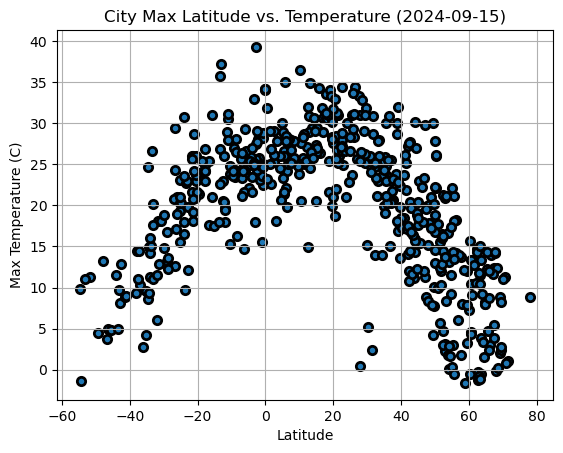

In [12]:
# Build scatter plot for latitude vs. temperature
city_max = city_data_df
plt.scatter(city_max['Lat'], city_max['Max Temp'], edgecolor='black', linewidth=2)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-09-15)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

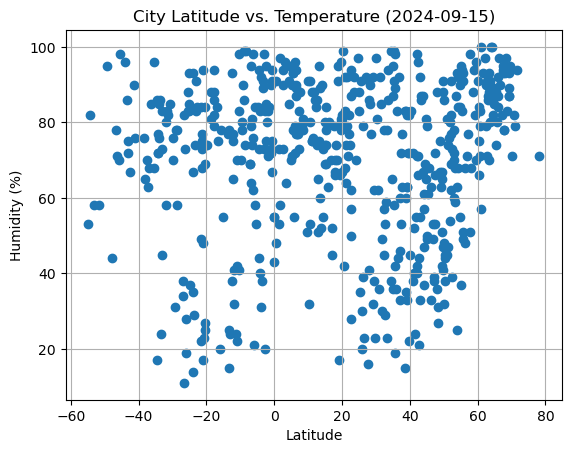

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_max['Lat'], city_max['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (2024-09-15)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

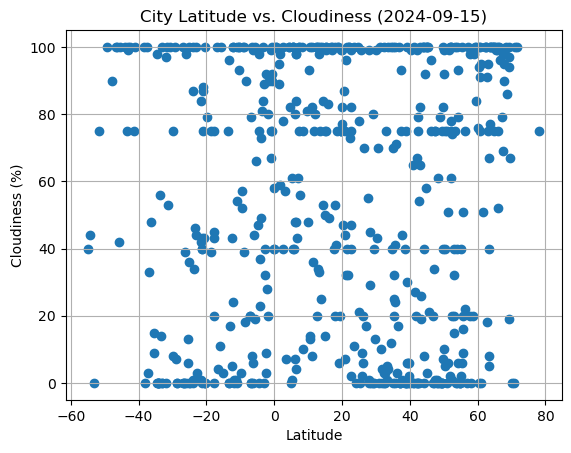

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_max['Lat'], city_max['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-09-15)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

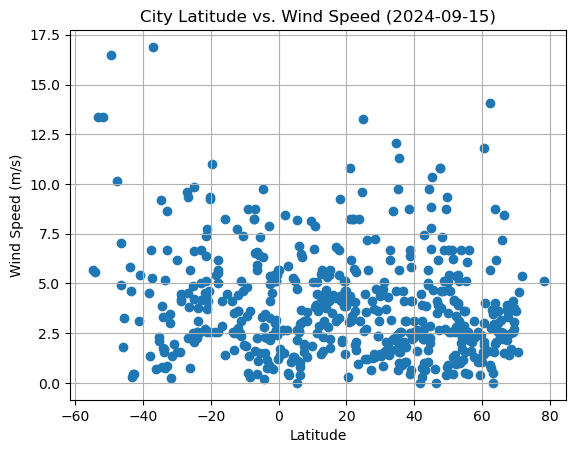

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_max['Lat'], city_max['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-09-15)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def renderChart(x,y,title):
    slope,intercept,rvalue = linregress(x,y)[:3]
    print(f'The r^2-value is: {rvalue}')
    plt.plot(x, x * slope + intercept, 'r' )
    plt.scatter(x,y, edgecolor='black', linewidth=2)
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.grid()
    plt.annotate(f'y = X{slope:.2f} + {intercept:.2f}', [x.min(),y.min()], color='r', fontsize=14)
    plt.title(f'Latitude vs {title} (09/16/24)')
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_max[city_max.Lat>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,salekhard,66.5300,66.6019,13.97,90,96,1.52,RU,1726519120
3,shanga,11.2106,4.5788,25.74,88,100,2.52,NG,1726519121
4,jamestown,42.0970,-79.2353,27.23,40,0,4.47,US,1726518921
7,stanley,54.8680,-1.6985,9.18,90,0,0.51,GB,1726519125
8,kingston,17.9970,-76.7936,33.53,66,20,9.26,JM,1726519095


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_max[city_max.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.48,95,100,16.48,TF,1726519117
1,bredasdorp,-34.5322,20.0403,8.62,86,0,0.82,ZA,1726519118
5,ushuaia,-54.8000,-68.3000,9.81,53,40,5.66,AR,1726518603
6,sao joao da barra,-21.6403,-41.0511,26.05,84,1,4.53,BR,1726519124
11,blackmans bay,-43.0167,147.3167,8.18,72,99,0.45,AU,1726519130


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.7579544018044483


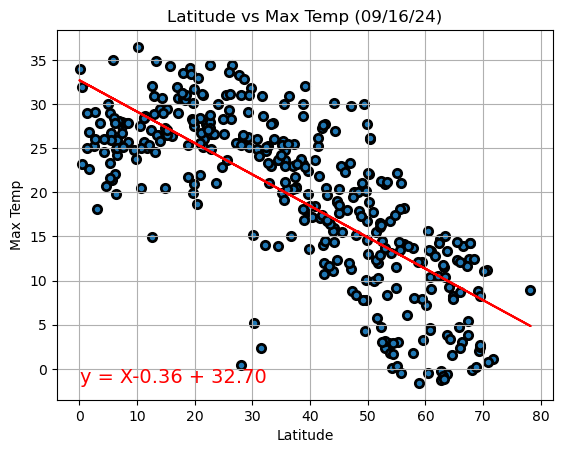

In [19]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df["Max Temp"]

renderChart(x,y, "Max Temp")

The r^2-value is: 0.7666539197858022


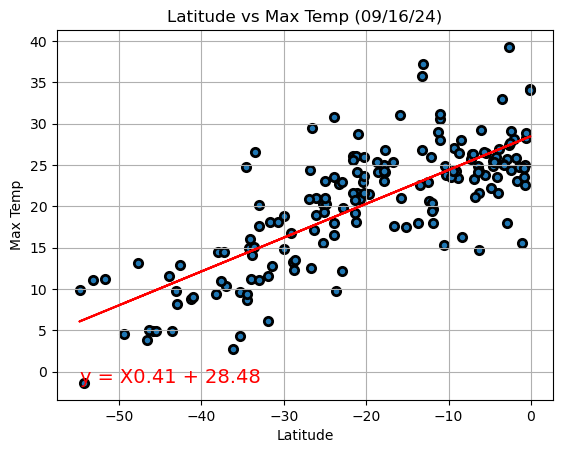

In [20]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df["Max Temp"]

renderChart(x,y, "Max Temp")

**Discussion about the linear relationship:** Per review temperature increases closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.034875459188915575


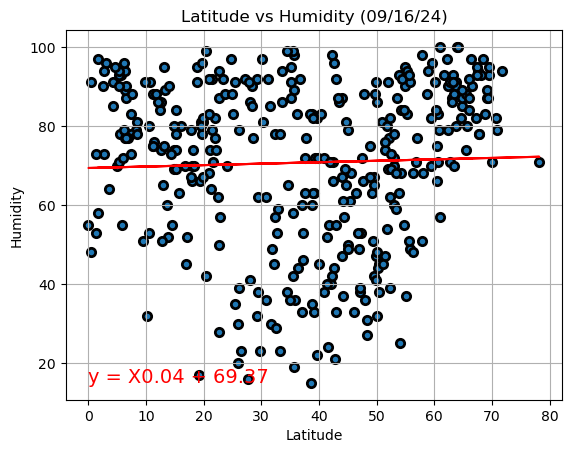

In [21]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df["Humidity"]

renderChart(x,y, "Humidity")

The r^2-value is: 0.00951444215208426


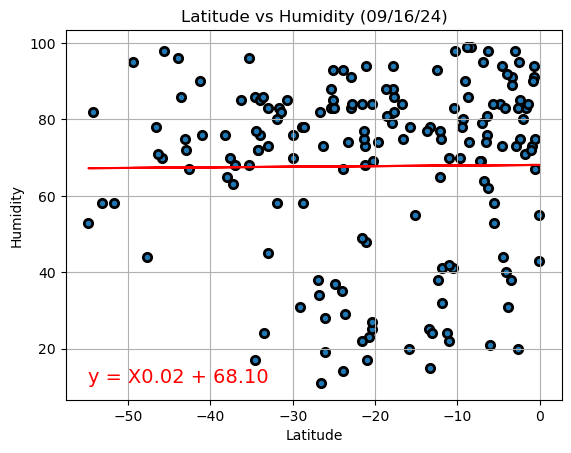

In [22]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df["Humidity"]

renderChart(x,y, "Humidity")

**Discussion about the linear relationship:** Per review humidity appears to increase closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.013321209224111603


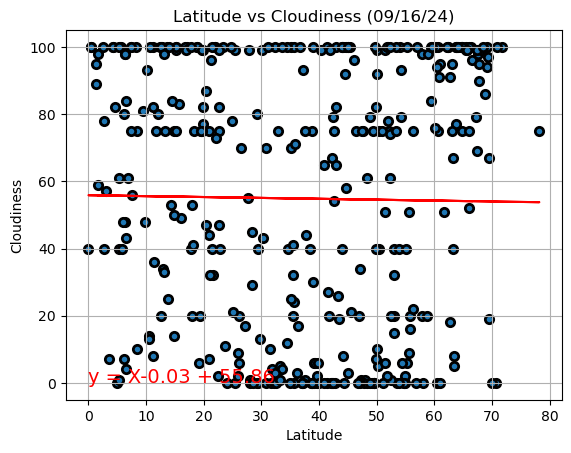

In [23]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df["Cloudiness"]

renderChart(x,y, "Cloudiness")

The r^2-value is: 6.055175976201864e-05


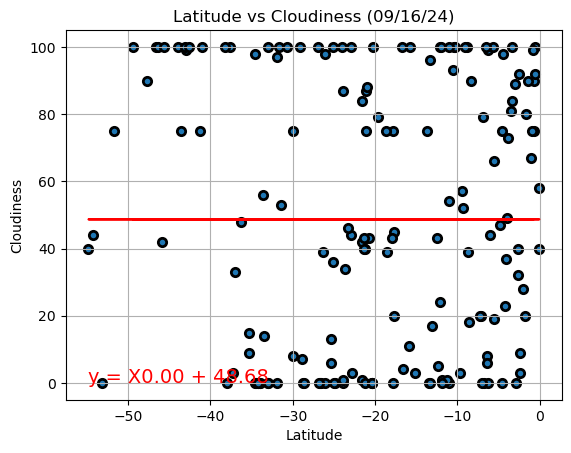

In [24]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df["Cloudiness"]

renderChart(x,y, "Cloudiness")

**Discussion about the linear relationship:** Per review nothern hemisphere does not have any variance, as to southern cloudiness increases near equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.05397600313726229


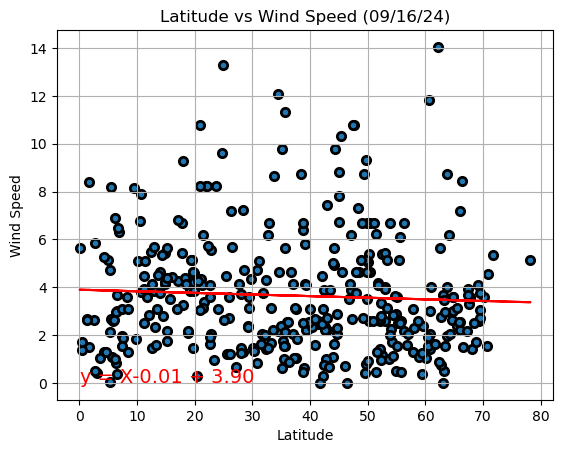

In [25]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df["Wind Speed"]

renderChart(x,y, "Wind Speed")

The r^2-value is: -0.1883840444270314


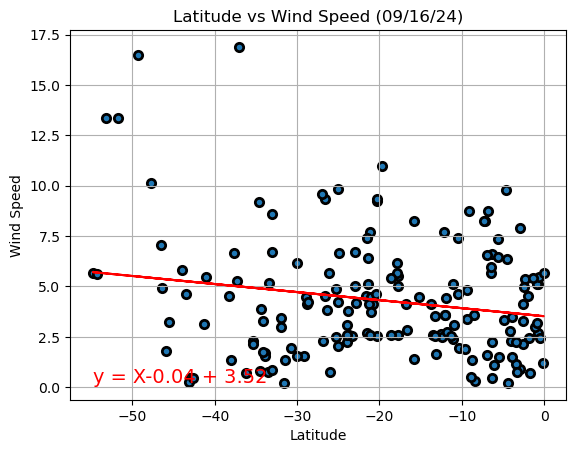

In [26]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df["Wind Speed"]

renderChart(x,y, "Wind Speed")

**Discussion about the linear relationship:** Per review northern hemisphere wind speeds appear consistent as opposed to the southern hemisphere which shows less density.